In [1]:
import pandas as pd
import mysql.connector
import plotly.express as px
import requests
import json

In [2]:
# Connection With MySQL :

mydb = mysql.connector.connect(host = "127.0.0.1",
                               port = "3306",
                               user = "root",
                               password = "Ramya$125",
                               database = "Phonepe")
cursor = mydb.cursor(buffered=True)

# Extracting DataFrames From MySQL:

# Aggregated Insurance :

cursor.execute(" SELECT * FROM aggregated_insurance")
mydb.commit()
table = cursor.fetchall()

Agg_Insur = pd.DataFrame(table ,columns = ['States','Years','Quarters','Transaction_Type','Transaction_Count','Transaction_Amount'])

# Aggregated Transaction :

cursor.execute(" SELECT * FROM aggregated_transaction")
mydb.commit()
table = cursor.fetchall()

Agg_Tran = pd.DataFrame(table ,columns = ['States','Years','Quarters','Transaction_Type','Transaction_Count','Transaction_Amount'])

# Aggregated User :

cursor.execute(" SELECT * FROM aggregated_user")
mydb.commit()
table = cursor.fetchall()

Agg_User = pd.DataFrame(table ,columns = ['States','Years','Quarters','Brands','Transaction_Count','Percentage'])

# Map Insurance :

cursor.execute(" SELECT * FROM map_insurance")
mydb.commit()
table = cursor.fetchall()

Map_Insur = pd.DataFrame(table ,columns = ['States','Years','Quarters','Districts','Transaction_Count','Transaction_Amount'])

# Map Transaction :

cursor.execute(" SELECT * FROM map_transaction")
mydb.commit()
table = cursor.fetchall()

Map_Tran = pd.DataFrame(table ,columns = ['States','Years','Quarters','Districts','Transaction_Count','Transaction_Amount'])

# Map User :

cursor.execute(" SELECT * FROM map_user")
mydb.commit()
table = cursor.fetchall()

Map_User = pd.DataFrame(table ,columns = ['States','Years','Quarters','Districts','Registered_Users','App_Opens'])

# Top Insurance :

cursor.execute(" SELECT * FROM top_insurance")
mydb.commit()
table = cursor.fetchall()

Top_Insur = pd.DataFrame(table ,columns = ['States','Years','Quarters','Pincodes','Transaction_Count','Transaction_Amount'])

# Top Transaction :

cursor.execute(" SELECT * FROM top_transaction")
mydb.commit()
table = cursor.fetchall()

Top_Tran = pd.DataFrame(table ,columns = ['States','Years','Quarters','Pincodes','Transaction_Count','Transaction_Amount'])

# Top User :

cursor.execute(" SELECT * FROM top_user")
mydb.commit()
table = cursor.fetchall()

Top_User = pd.DataFrame(table ,columns = ['States','Years','Quarters','Pincodes','Registered_Users'])

In [3]:
# Connection With MySQL :
def top_chart_transaction_amount(table_name):
    mydb = mysql.connector.connect(host = "127.0.0.1",
                                   port = "3306",
                                   user = "root",
                                   password = "Ramya$125",
                                   database = "Phonepe")
    cursor = mydb.cursor(buffered=True)
    
    # Plot 1 :
    
    query1 = f'''select States, sum(transaction_amount) as Transaction_Amount from {table_name}
                 group by states 
                 order by Transaction_Amount desc
                 limit 10;
                    '''
    cursor.execute(query1)
    table_1 = cursor.fetchall()
    mydb.commit()
    
    df_1 = pd.DataFrame(table_1, columns=['States','Transaction_Amount'])
    
    fig_amount_1 = px.bar(df_1, x = "States", y = "Transaction_Amount", title = " Top 10  =>  Transaction Amount",
                            color_discrete_sequence= px.colors.sequential.Peach_r, height = 500, hover_name = "States")
    fig_amount_1.show()
    
    # Plot 2:
    
    query2 = f'''select States, sum(transaction_amount) as Transaction_Amount from {table_name}
                 group by states 
                 order by Transaction_Amount 
                 limit 10;
                    '''
    cursor.execute(query2)
    table_2 = cursor.fetchall()
    mydb.commit()
    
    df_2 = pd.DataFrame(table_2, columns=['States','Transaction_Amount'])
    
    fig_amount_2= px.bar(df_2, x = "States", y = "Transaction_Amount", title = "Least 10  =>  Transaction Amount",
                            color_discrete_sequence= px.colors.sequential.Greens_r, height = 500, hover_name = "States")
    fig_amount_2.show()
    
    # Plot 3:
    
    query3 = f'''select States, avg(transaction_amount) as Transaction_Amount from {table_name}
                 group by states 
                 order by Transaction_Amount ;
                    '''
    cursor.execute(query3)
    table_3 = cursor.fetchall()
    mydb.commit()
    
    df_3 = pd.DataFrame(table_3, columns=['States','Transaction_Amount'])
    
    fig_amount_3= px.bar(df_3, x = "Transaction_Amount", y = "States", title = "Average Of Transaction Amount", orientation = 'h',
                            color_discrete_sequence= px.colors.sequential.amp_r, height = 500, hover_name = "States")
    fig_amount_3.show()
        

In [4]:
# Transaction Count:
def top_chart_transaction_count(table_name):
    # Connection With MySQL :
    mydb = mysql.connector.connect(host = "127.0.0.1",
                                   port = "3306",
                                   user = "root",
                                   password = "Ramya$125",
                                   database = "Phonepe")
    cursor = mydb.cursor(buffered=True)
    
    # Plot 1 :
    
    query1 = f'''select States, sum(transaction_count) as Transaction_Count from {table_name}
                 group by states 
                 order by Transaction_Count desc
                 limit 10;
                    '''
    cursor.execute(query1)
    table_1 = cursor.fetchall()
    mydb.commit()
    
    df_1 = pd.DataFrame(table_1, columns=['States','Transaction_Count'])
    
    fig_amount_1 = px.bar(df_1, x = "States", y = "Transaction_Count", title = " Top 10  =>  Transaction Count",
                            color_discrete_sequence= px.colors.sequential.Peach_r, height = 500, hover_name = "States")
    fig_amount_1.show()
    
    # Plot 2:
    
    query2 = f'''select States, sum(transaction_count) as Transaction_Count from {table_name}
                 group by states 
                 order by Transaction_Count 
                 limit 10;
                    '''
    cursor.execute(query2)
    table_2 = cursor.fetchall()
    mydb.commit()
    
    df_2 = pd.DataFrame(table_2, columns=['States','Transaction_Count'])
    
    fig_amount_2= px.bar(df_2, x = "States", y = "Transaction_Count", title = "Least 10  =>  Transaction Count",
                            color_discrete_sequence= px.colors.sequential.Greens_r, height = 500, hover_name = "States")
    fig_amount_2.show()
    
    # Plot 3:
    
    query3 = f'''select States, avg(transaction_count) as Transaction_Count from {table_name}
                 group by states 
                 order by Transaction_Count ;
                    '''
    cursor.execute(query3)
    table_3 = cursor.fetchall()
    mydb.commit()
    
    df_3 = pd.DataFrame(table_3, columns=['States','Transaction_Count'])
    
    fig_amount_3= px.bar(df_3, x = "Transaction_Count", y = "States", title = "Average Of Transaction Count", orientation = 'h',
                            color_discrete_sequence= px.colors.sequential.amp_r, height = 800,width = 1000 ,hover_name = "States")
    fig_amount_3.show()
        

In [41]:
# Map User Register User :

def top_chart_registered_user(table_name, state):
    # Connection With MySQL :
    mydb = mysql.connector.connect(host = "127.0.0.1",
                                   port = "3306",
                                   user = "root",
                                   password = "Ramya$125",
                                   database = "Phonepe")
    cursor = mydb.cursor(buffered=True)
    
    # Plot 1 :
    
    query1 = f'''select Districts, sum(registered_users) as Registered_Users from {table_name}
                 where States = '{state}'
                 group by Districts
                 order by Registered_Users desc
                 limit 10;

                    '''
    cursor.execute(query1)
    table_1 = cursor.fetchall()
    mydb.commit()
    
    df_1 = pd.DataFrame(table_1, columns=['Districts','Registerd_Users'])
    
    fig_amount_1 = px.bar(df_1, x = "Districts", y = "Registerd_Users", title = " Top 10  => Registered Users",width = 600,
                            color_discrete_sequence= px.colors.sequential.YlGnBu_r, height = 615, hover_name = "Districts")
    fig_amount_1.show()
    
    # Plot 2:
    
    query2 = f'''select Districts, sum(registered_users) as Registered_Users from {table_name}
                 where States = '{state}'
                 group by Districts
                 order by Registered_Users 
                 limit 10;
                    '''
    cursor.execute(query2)
    table_2 = cursor.fetchall()
    mydb.commit()
    
    df_2 = pd.DataFrame(table_2, columns=['Districts','Registerd_Users'])
    
    fig_amount_2= px.bar(df_2, x = "Districts", y = "Registerd_Users", title = "Least 10  =>  Registerd Users",height = 615,
                            color_discrete_sequence= px.colors.sequential.Rainbow, width = 600, hover_name = "Districts")
    fig_amount_2.show()
    
    # Plot 3:
    
    query3 = f'''select Districts, avg(registered_users) as Registered_Users from {table_name}
                 where States = '{state}'
                 group by Districts
                 order by Registered_Users ;
                    '''
    cursor.execute(query3)
    table_3 = cursor.fetchall()
    mydb.commit()
    
    df_3 = pd.DataFrame(table_3, columns=['Districts','Registerd_Users'])
    
    fig_amount_3= px.bar(df_3, x = "Registerd_Users", y = "Districts", title = "Average Of Registerd Users", orientation = 'h',width = 1000,
                            color_discrete_sequence= px.colors.sequential.Rainbow_r, height = 800, hover_name = "Districts")
    fig_amount_3.show()
        

In [52]:
# Map User App Opens  :

def top_chart_app_opens(table_name, state):
    # Connection With MySQL :
    mydb = mysql.connector.connect(host = "127.0.0.1",
                                   port = "3306",
                                   user = "root",
                                   password = "Ramya$125",
                                   database = "Phonepe")
    cursor = mydb.cursor(buffered=True)
    
    # Plot 1 :
    
    query1 = f'''select Districts, sum(App_Opens) as App_Opens from {table_name}
                where States ='{state}'
                group by Districts
                order by App_Opens desc
                limit 10;

                    '''
    cursor.execute(query1)
    table_1 = cursor.fetchall()
    mydb.commit()
    
    df_1 = pd.DataFrame(table_1, columns=['Districts','App_Opens'])
    
    fig_amount_1 = px.bar(df_1, x = "Districts", y = "App_Opens", title = " Top 10  => App Opens",width = 600,
                            color_discrete_sequence= px.colors.sequential.YlGnBu_r, height = 615, hover_name = "Districts")
    fig_amount_1.show()
    
    # Plot 2:
    
    query2 = f'''select Districts, sum(App_Opens) as App_Opens from {table_name}
                where States ='{state}'
                group by Districts
                order by App_Opens 
                limit 10;
                    '''
    cursor.execute(query2)
    table_2 = cursor.fetchall()
    mydb.commit()
    
    df_2 = pd.DataFrame(table_2, columns=['Districts','App_Opens'])
    
    fig_amount_2= px.bar(df_2, x = "Districts", y = "App_Opens", title = "Least 10  =>  App Opens",height = 615,
                            color_discrete_sequence= px.colors.sequential.Rainbow, width = 600, hover_name = "Districts")
    fig_amount_2.show()
    
    # Plot 3:
    
    query3 = f'''select Districts, avg(App_Opens) as App_Opens from {table_name}
                 where States = '{state}'
                 group by Districts
                 order by App_Opens ;
                    '''
    cursor.execute(query3)
    table_3 = cursor.fetchall()
    mydb.commit()
    
    df_3 = pd.DataFrame(table_3, columns=['Districts','App_Opens'])
    
    fig_amount_3= px.bar(df_3, x = "App_Opens", y = "Districts", title = "Average Of App_Opens", orientation = 'h',width = 1000,
                            color_discrete_sequence= px.colors.sequential.Rainbow_r, height = 800, hover_name = "Districts")
    fig_amount_3.show()
        

In [57]:
# Top User Register User :

def top_chart_registered_users(table_name):
    # Connection With MySQL :
    mydb = mysql.connector.connect(host = "127.0.0.1",
                                   port = "3306",
                                   user = "root",
                                   password = "Ramya$125",
                                   database = "Phonepe")
    cursor = mydb.cursor(buffered=True)
    
    # Plot 1 :
    
    query1 = f'''select States, sum(registered_users) as Registered_Users from {table_name}
                 group by States
                 order by Registered_Users desc
                 limit 10;

                    '''
    cursor.execute(query1)
    table_1 = cursor.fetchall()
    mydb.commit()
    
    df_1 = pd.DataFrame(table_1, columns=['States','Registerd_Users'])
    
    fig_amount_1 = px.bar(df_1, x = "States", y = "Registerd_Users", title = " Top 10  => Registered Users",width = 600,
                            color_discrete_sequence= px.colors.sequential.YlGnBu_r, height = 615, hover_name = "States")
    fig_amount_1.show()
    
    # Plot 2:
    
    query2 = f'''select States, sum(registered_users) as Registered_Users from {table_name}
                 group by States
                 order by Registered_Users 
                 limit 10;
                    '''
    cursor.execute(query2)
    table_2 = cursor.fetchall()
    mydb.commit()
    
    df_2 = pd.DataFrame(table_2, columns=['States','Registerd_Users'])
    
    fig_amount_2= px.bar(df_2, x = "States", y = "Registerd_Users", title = "Least 10  =>  Registerd Users",height = 615,
                            color_discrete_sequence= px.colors.sequential.Rainbow, width = 600, hover_name = "States")
    fig_amount_2.show()
    
    # Plot 3:
    
    query3 = f'''select States, avg(registered_users) as Registered_Users from {table_name}
                 group by States
                 order by Registered_Users ;
                    '''
    cursor.execute(query3)
    table_3 = cursor.fetchall()
    mydb.commit()
    
    df_3 = pd.DataFrame(table_3, columns=['States','Registerd_Users'])
    
    fig_amount_3= px.bar(df_3, x = "Registerd_Users", y = "States", title = "Average Of Registerd Users", orientation = 'h',width = 1000,
                            color_discrete_sequence= px.colors.sequential.Rainbow_r, height = 800, hover_name = "States")
    fig_amount_3.show()
        

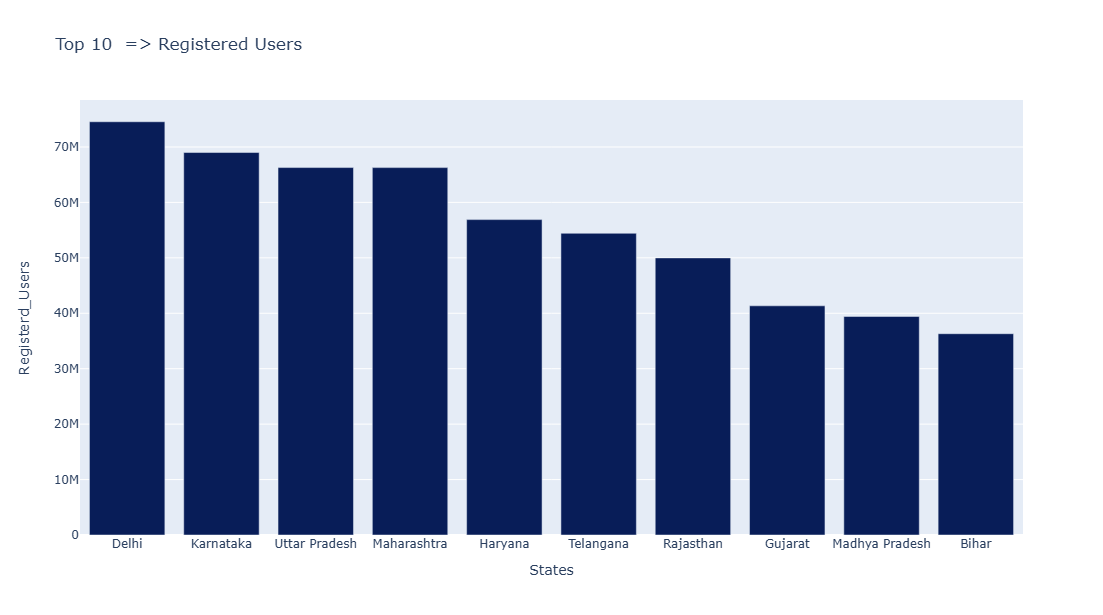

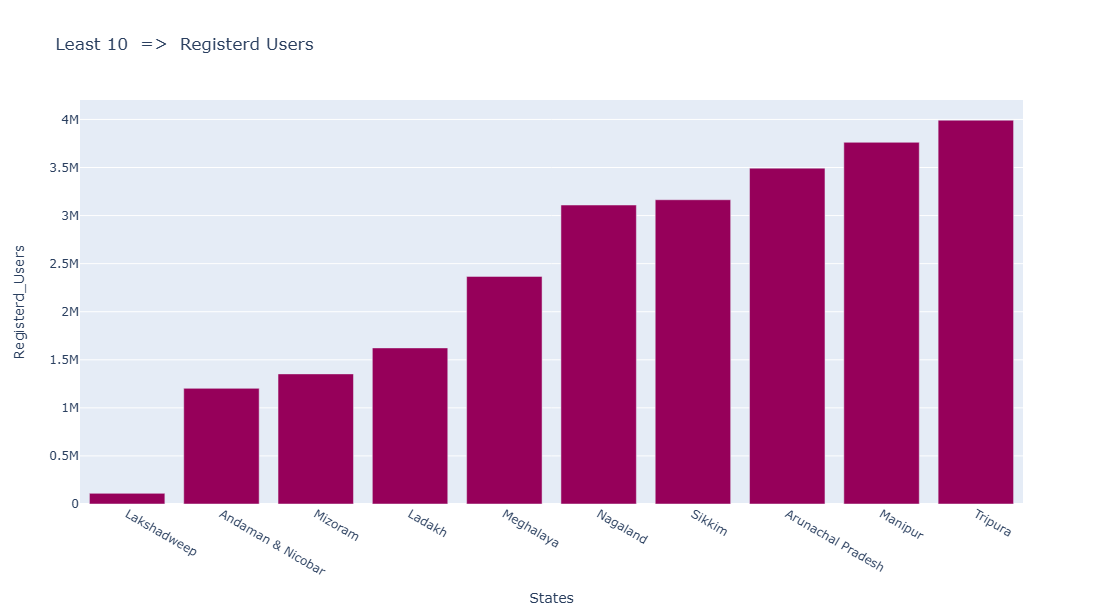

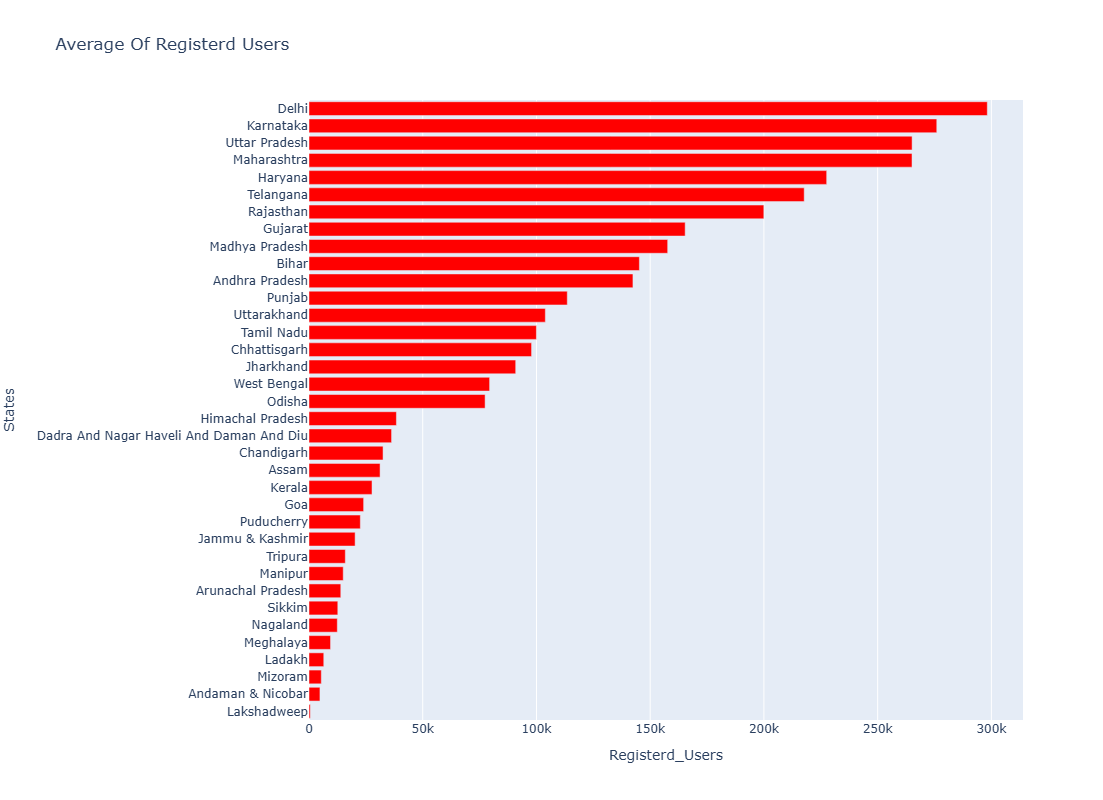

In [58]:
top_chart_registered_users("Top_User")

## Transaction year 

In [ ]:
# Transaction Based on year :

def tran_amount_count_year(df, year):

    tacy = df[df['Years'] == year]
    tacy.reset_index(drop = True, inplace = True)
    
    tacyg = tacy.groupby('States')[["Transaction_Count","Transaction_Amount"]].sum()
    tacyg.reset_index(inplace = True)
    
    fig_amount = px.bar(tacyg, x = "States", y = "Transaction_Amount", title = f"{year} => Transaction Amount",
                        color_discrete_sequence= px.colors.sequential.Peach_r)
    fig_amount.show()
    
    fig_count = px.bar(tacyg, x = "States", y = "Transaction_Count", title = f"{year} => Transaction Count",
                        color_discrete_sequence= px.colors.sequential.algae_r)
    fig_count.show()
    
    url = "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson"
    
    response = requests.get(url)
    data = json.loads(response.content)
    states_name = []
    for feature in data['features']:
        states_name.append(feature['properties']['ST_NM'])
    
    states_name.sort()
    
    fig_india_1 = px.choropleth(tacyg, geojson = data, locations = "States", featureidkey= "properties.ST_NM",
                                color = "Transaction_Amount", color_continuous_scale="tealrose",
                                range_color = (tacyg["Transaction_Amount"].min(),tacyg["Transaction_Amount"].max()),
                                hover_name = "States", title = f"{year} => Transaction Amount",
                                fitbounds = "locations", height = 500, width = 500)
    fig_india_1.update_geos(visible = False)
    fig_india_1.show()

    fig_india_2 = px.choropleth(tacyg, geojson = data, locations = "States", featureidkey= "properties.ST_NM",
                                color = "Transaction_Count", color_continuous_scale="tealrose",
                                range_color = (tacyg["Transaction_Count"].min(),tacyg["Transaction_Count"].max()),
                                hover_name = "States", title = f"{year} => Transaction Count",
                                fitbounds = "locations", height = 500, width = 500)
    fig_india_2.update_geos(visible = False)
    fig_india_2.show()
    return tacy

# Transaction Quarter

In [ ]:
# Transaction Based on Quarter :

def tran_amount_count_quarter(df, quarter):

    tacy = df[df['Quarters'] == quarter]
    tacy.reset_index(drop = True, inplace = True)
    
    tacyg = tacy.groupby('States')[["Transaction_Count","Transaction_Amount"]].sum()
    tacyg.reset_index(inplace = True)
    
    fig_amount = px.bar(tacyg, x = "States", y = "Transaction_Amount", title = f"Year :{tacy['Years'].min()}  Quarter:{quarter} => Transaction Amount",
                        color_discrete_sequence= px.colors.sequential.Peach_r)
    fig_amount.show()
    
    fig_count = px.bar(tacyg, x = "States", y = "Transaction_Count", title = f"Year :{tacy['Years'].min()}  Quarter:{quarter} => Transaction Count",
                        color_discrete_sequence= px.colors.sequential.algae_r)
    fig_count.show()
    
    url = "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson"
    
    response = requests.get(url)
    data = json.loads(response.content)
    states_name = []
    for feature in data['features']:
        states_name.append(feature['properties']['ST_NM'])
    
    states_name.sort()
    
    fig_india_1 = px.choropleth(tacyg, geojson = data, locations = "States", featureidkey= "properties.ST_NM",
                                color = "Transaction_Amount", color_continuous_scale="tealrose",
                                range_color = (tacyg["Transaction_Amount"].min(),tacyg["Transaction_Amount"].max()),
                                hover_name = "States", title = f"Year :{tacy['Years'].min()}  Quarter:{quarter} => Transaction Amount",
                                fitbounds = "locations", height = 500, width = 500)
    fig_india_1.update_geos(visible = False)
    fig_india_1.show()

    fig_india_2 = px.choropleth(tacyg, geojson = data, locations = "States", featureidkey= "properties.ST_NM",
                                color = "Transaction_Count", color_continuous_scale="tealrose",
                                range_color = (tacyg["Transaction_Count"].min(),tacyg["Transaction_Count"].max()),
                                hover_name = "States", title = f"Year :{tacy['Years'].min()}  Quarter:{quarter} => Transaction Count",
                                fitbounds = "locations", height = 500, width = 500)
    fig_india_2.update_geos(visible = False)
    fig_india_2.show()
    return tacy
    

# Aggregated Transaction type :

In [ ]:
# Transaction Type based on state  :

def agg_tran_tran_type (df, state ):
    tacy= df[df['States'] == state]
    tacy.reset_index(drop = True, inplace = True)
    
    tacyg = tacy.groupby('Transaction_Type')[['Transaction_Count','Transaction_Amount']].sum()
    tacyg.reset_index( inplace = True)
    
    fig_pie_1 = px.pie(data_frame = tacyg, width=1000,names = "Transaction_Type", values = "Transaction_Amount",
                        title = f"{state } => Transaction Amount", hole=0.5)
    fig_pie_1.show()
    
    fig_pie_2 = px.pie(data_frame = tacyg, width=1000,names = "Transaction_Type", values = "Transaction_Count",
                        title = f"{state} => Transaction Count", hole=0.5)
    fig_pie_2.show()

## Aggregated User :

In [ ]:
# Aggregated User Brands Transaction Count Based On Year:

def agg_user_brand_count_y(df, year):
    aguy = df[df['Years'] == year]
    aguy.reset_index(drop = True, inplace = True)
    
    aguyg = pd.DataFrame(aguy.groupby('Brands')["Transaction_Count"].sum())
    aguyg.reset_index(inplace = True)
    
    fig_bar_1 = px.bar(aguyg, x = "Brands", y = "Transaction_Count", title = f"{year} => Brands And Transaction Count",
                       width = 800, height = 500,color_discrete_sequence=px.colors.sequential.Sunset_r, hover_name = "Brands")
    fig_bar_1.show()

    return aguy

In [ ]:
# Aggregated User Brands Transaction Count Based On Year And Quarter :

def agg_user_brand_count_quarter(df, quarter):
    
    aguyq = df[df['Quarters'] == quarter]
    aguyq.reset_index(drop = True, inplace = True)
    
    aguyqg = pd.DataFrame(aguyq.groupby("Brands")['Transaction_Count'].sum())
    aguyqg.reset_index(inplace = True)
    
    fig_bar_1 = px.bar(aguyqg, x = "Brands", y = "Transaction_Count", title = f"Year:{agg_user_y['Years'].min()}  Quarter:{quarter} => Brands And Transaction Count",
                           width = 800, height = 500,color_discrete_sequence=px.colors.sequential.Sunset_r, hover_name = "Brands")
    fig_bar_1.show()

    return aguyq


In [ ]:
# Aggregated User Brands And Percentage Based On State:

def agg_user_brand_count_state(df, state):
    auyqs = df[df['States']== state]    
    auyqs.reset_index(drop = True, inplace = True) 
    
    fig_line_1 = px.line(auyqs, x = "Brands", y = "Transaction_Count" ,title = f"Year:{df['Years'].min()}  State:{state} => Brands, Transaction Count And Percentage", 
                         width = 1000,height = 500, hover_data = ['Percentage'], markers = True)
    fig_line_1.show()

## Map Insurance :

In [ ]:
# Map Insurance District Transaction Amount And Count based on state  :

def map_insur_dist (df, state ):
    tacy= df[df['States'] == state]
    tacy.reset_index(drop = True, inplace = True)
    
    tacyg = tacy.groupby("Districts")[['Transaction_Count','Transaction_Amount']].sum()
    tacyg.reset_index( inplace = True)
    
    fig_bar_1 = px.bar(tacyg, x = "Transaction_Amount", y = "Districts", orientation= 'h', color_discrete_sequence=px.colors.sequential.Mint_r,
                       title = f"State : {state} => District And Transaction Amount", height = 500)
    fig_bar_1.show()

    fig_bar_2 = px.bar(tacyg, x = "Transaction_Count", y = "Districts", orientation= 'h', color_discrete_sequence=px.colors.sequential.Mint_r,
                       title = f"State : {state} => District And Transaction Count", height = 500)
    fig_bar_2.show()

## Map User :

In [ ]:
# Map User Registered User And App Opens based on Year, Group By States: 

def map_user_year(df, year):
    muy = df[df['Years'] == year]
    muy.reset_index(drop = True, inplace = True)
    
    muyg = muy.groupby('States')[["Registered_Users", "App_Opens"]].sum()
    muyg.reset_index(inplace = True)
    
    fig_line_1 = px.line(muyg, x = "States", y = ["Registered_Users","App_Opens" ],width = 1000,height = 800,markers = True,
                         title = f"Year:{year} => Registered Users And App Opens ")
    fig_line_1.show()
    return muy

In [ ]:
# Map User Registered User And App Opens based on Quarter, Group By States: 

def map_user_quarter(df, quarter):
    muyq = df[df['Quarters'] == quarter]
    muyq.reset_index(drop = True, inplace = True)
    
    muyqg = muyq.groupby('States')[["Registered_Users", "App_Opens"]].sum()
    muyqg.reset_index(inplace = True)
    
    fig_line_1 = px.line(muyqg, x = "States", y = ["Registered_Users","App_Opens" ],width = 1000,height = 800,markers = True,
                         title = f"Year:{df['Years'].min()}  Quarter:{quarter} => Registered Users And App Opens ",color_discrete_sequence=px.colors.sequential.Rainbow)
    fig_line_1.show()
    return muyq

In [35]:
# Map User Registered Users And App Opens Based On States And Districts :

def map_user_state_district(df, state):
    muyqs = df[df['States'] == state]
    muyqs.reset_index(drop = True, inplace = True)
    
    fig_bar_1 = px.bar(muyqs, x = "Registered_Users", y= "Districts", orientation= 'h', title = 'Register Users',
                       height = 600, width = 500,color_discrete_sequence= px.colors.sequential.Rainbow)
    fig_bar_1.show()
    
    fig_bar_2 = px.bar(muyqs, x = "App_Opens", y= "Districts", orientation= 'h', title = 'App Opens',
                       height = 600, width = 500, color_discrete_sequence= px.colors.sequential.Sunsetdark_r)
    fig_bar_2.show()

## Top Insurance:

In [66]:
# Top Insurance State,Quarters And Pincodes Wise Transaction Amount And Count : 

def top_insur_quarter_state(df, state):
    tiy = df[df['States'] == state]
    tiy.reset_index(drop = True, inplace = True)
    
    fig_bar_1 = px.bar(tiy, x = "Quarters", y= "Transaction_Amount",  title = f"Year:{df['Years'].min()}  Transaction Amount", hover_data = ["Pincodes"],
                       height = 600, color_discrete_sequence= px.colors.sequential.Peach_r)
    fig_bar_1.show()
    
    fig_bar_2 = px.bar(tiy, x = "Quarters", y= "Transaction_Count", title = f"Year:{df['Years'].min()}  Transaction Count",hover_data = ["Pincodes"],
                       height = 600, color_discrete_sequence= px.colors.sequential.Greens_r)
    fig_bar_2.show()

## Top User :

In [88]:
def top_user_year(df, year):
    tuy = Top_User[Top_User['Years'] == 2020]
    tuy.reset_index(drop = True, inplace = True)
    
    tuyg =pd.DataFrame( tuy.groupby(['States','Quarters'])["Registered_Users"].sum())
    tuyg.reset_index(inplace = True)
    
    fig_bar_1 = px.bar(tuyg, x = "States", y = "Registered_Users", color="Quarters",color_discrete_sequence=px.colors.sequential.Burgyl,
                       width = 1000, height = 800, title = f"Year:{df['Years'].min()}  => Registerd Users ", hover_name ='States')
    fig_bar_1.show()
    return tuy

In [101]:
# Top User  Registerd Users , Pincodes And Quarters Based On State:

def top_user_state(df, state):
    tuys = df[df['States'] == state]
    tuys.reset_index(drop = True, inplace = True)
    
    fig_bar_1 = px.bar(tuys, x = "Quarters", y = "Registered_Users", title = f"State:{state} => Registerd Users , Pincodes And Quarters",
                       width = 1000, height = 800, color="Registered_Users",hover_data = ["Pincodes"],
                       color_continuous_scale= px.colors.sequential.Agsunset_r)
    fig_bar_1.show()

### Aggregated Insurance 

In [ ]:
# Aggregated Insurance Year:

tac_Y = tran_amount_count_year(Agg_Insur,2022)

In [ ]:
tran_amount_count_quarter(tac_Y,4)

## Aggregated Transaction

In [ ]:
# Aggregated Transaction based on year:

agg_tran_tac_Y = tran_amount_count_year(Agg_Tran,2022)

In [ ]:
agg_tran_tran_type(agg_tran_tac_Y, "Bihar")

In [ ]:
# Aggregated Transaction based on quarter :

agg_tran_tac_quarter = tran_amount_count_quarter(agg_tran_tac_Y,4)

In [ ]:
agg_tran_tran_type(agg_tran_tac_quarter, "Bihar")

## Aggregated User

In [ ]:
# Aggregated User Brands Transaction Count Based On year :
agg_user_y = agg_user_brand_count_y(Agg_User, 2020)

In [ ]:
# State wise brand and Percentage :
agg_user_brand_count_state(agg_user_yq, "Bihar")

In [ ]:
# Quarter Wise :
agg_user_yq = agg_user_brand_count_quarter(agg_user_y, 3)

## Map Insurance

In [ ]:
map_insur_tac_Y = tran_amount_count_year(Map_Insur,2022)
map_insur_tac_Y

In [ ]:
map_insur_dist(map_insur_tac_Y, "Tamil Nadu")

In [ ]:
map_insur_tac_quarter = tran_amount_count_quarter(map_insur_tac_Y,4)

In [ ]:
map_insur_dist(map_insur_tac_quarter, "Bihar")

## Map Transaction :

In [ ]:
map_tran_tac_Y = tran_amount_count_year(Map_Tran,2022)
map_tran_tac_Y

In [ ]:
map_insur_dist(map_tran_tac_Y, "Tamil Nadu")

In [ ]:
map_tran_tac_quarter = tran_amount_count_quarter(map_tran_tac_Y,4)

In [ ]:
map_insur_dist(map_tran_tac_quarter, "Bihar")

## Map User

In [ ]:
map_user_y = map_user_year(Map_User, 2020)

In [ ]:
map_user_q = map_user_quarter(map_user_y, 4)

In [ ]:
map_user_state_district(map_user_q, "West Bengal")

## Top Insurance:

In [ ]:
top_insur_year = tran_amount_count_year(Top_Insur, 2022)

In [ ]:
 top_insur_quarter_state(top_insur_year, "Tamil Nadu")

In [ ]:
top_insur_quarter = tran_amount_count_quarter(top_insur_year, 4)

## Top Transaction:

In [ ]:
top_tran_year = tran_amount_count_year(Top_Insur, 2022)

In [ ]:
 top_insur_quarter_state(top_tran_year, "Tamil Nadu")

In [ ]:
top_tran_quarter = tran_amount_count_quarter(top_tran_year, 4)

## Top User:

In [ ]:
top_user_y = top_user_year(Top_User, 2022)

In [ ]:
top_user_state(top_user_y, "Bihar")